# Linear Regression using Statistics:

For example, in a simple regression problem (a single x and a single y), the form of the model would be:


y = B0 + B1 * x

<center>
<img src="b1estimation.png"/>
</center>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 

In [3]:
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # function to show plot 
    plt.show() 

Estimated coefficients:
b_0 = 0.39999999999999947  \ 
b_1 = 0.8


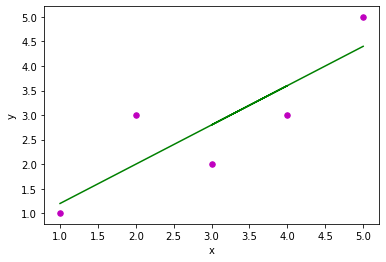

In [4]:
def main(): 
    # observations 
    
 #   x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
 #   y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]) 
    x = np.array([ 1, 2, 4, 3, 5]) 
    y = np.array([1, 3, 3,2, 5]) 
  
  
    # estimating coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients:\nb_0 = {}  \ \nb_1 = {}".format(b[0], b[1])) 
  
    # plotting regression line 
    plot_regression_line(x, y, b) 
  
if __name__ == "__main__": 
    main() 

# Linear Regression using Linear Algebra:

<center>
<img src="leastsquares_linearalgebra.png"/>
</center>

[1.00233226]


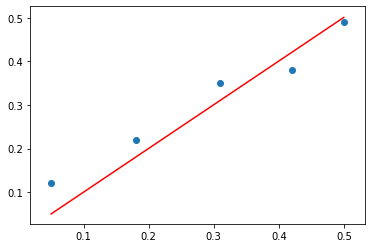

In [27]:
from numpy import array
from numpy.linalg import inv
from matplotlib import pyplot
data = array([
 [0.05, 0.12],
 [0.18, 0.22],
 [0.31, 0.35],
 [0.42, 0.38],
 [0.5, 0.49],
 ])
X, y = data[:,0], data[:,1]
X = X.reshape((len(X), 1))
# linear least squares
b = inv(X.T.dot(X)).dot(X.T).dot(y)
print(b)
# predict using coefficients
yhat = X.dot(b)
# plot data and predictions
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color='red')
pyplot.show()


# Single Variable Linear Regression using Scikit learn

In [5]:
# import require modules

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn. metrics import r2_score

In [6]:
# Data Preparation

x = [i for i in range(1,101)]
y = [i**(1/2) for i in range(1, 101)]

In [7]:
print(x)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [8]:
print(y)

[1.0, 1.4142135623730951, 1.7320508075688772, 2.0, 2.23606797749979, 2.449489742783178, 2.6457513110645907, 2.8284271247461903, 3.0, 3.1622776601683795, 3.3166247903554, 3.4641016151377544, 3.605551275463989, 3.7416573867739413, 3.872983346207417, 4.0, 4.123105625617661, 4.242640687119285, 4.358898943540674, 4.47213595499958, 4.58257569495584, 4.69041575982343, 4.795831523312719, 4.898979485566356, 5.0, 5.0990195135927845, 5.196152422706632, 5.291502622129181, 5.385164807134504, 5.477225575051661, 5.5677643628300215, 5.656854249492381, 5.744562646538029, 5.830951894845301, 5.916079783099616, 6.0, 6.082762530298219, 6.164414002968976, 6.244997998398398, 6.324555320336759, 6.4031242374328485, 6.48074069840786, 6.557438524302, 6.6332495807108, 6.708203932499369, 6.782329983125268, 6.855654600401044, 6.928203230275509, 7.0, 7.0710678118654755, 7.14142842854285, 7.211102550927978, 7.280109889280518, 7.3484692283495345, 7.416198487095663, 7.483314773547883, 7.54983443527075, 7.61577310586390

In [9]:
# create a data frame

df = pd.DataFrame({'x':x,'y':y})
df

,x,y
0,1,1.000000
1,2,1.414214
2,3,1.732051
3,4,2.000000
4,5,2.236068
...,...,...
95,96,9.797959
96,97,9.848858
97,98,9.899495
98,99,9.949874


In [10]:
X = df[['x']]
y = df['y']

In [11]:
X

,x
0,1
1,2
2,3
3,4
4,5
...,...
95,96
96,97
97,98
98,99


In [12]:
y

0      1.000000
1      1.414214
2      1.732051
3      2.000000
4      2.236068
        ...    
95     9.797959
96     9.848858
97     9.899495
98     9.949874
99    10.000000
Name: y, Length: 100, dtype: float64

In [13]:
type(X)

pandas.core.frame.DataFrame

In [14]:
type(y)

pandas.core.series.Series

In [15]:
#create model

model = LinearRegression()

#train model

model.fit(X,y)

#help(LinearRegression)

LinearRegression()

In [19]:
#testing the model

model.predict([[6]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.19396481])

In [17]:
model.predict([[25]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.69716994])

In [18]:
model.predict([[144]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14.11198107])

In [21]:
model.predict([[5000]])

array([398.29956768])

In [16]:
# with 10 values we have not got the right predicted values so,
#lets try and train the model for 100 values and test the results

# Multiple Linear Regression - Prdicting Price of a House 

In [2]:
from sklearn.datasets import load_boston

In [23]:
#load dataset
boston_dataset = load_boston()

In [24]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [25]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [26]:
print(boston_dataset.data.shape)

(506, 13)


In [27]:
boston = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [28]:
boston['MEDV'] = boston_dataset.target

In [29]:
boston['MEDV']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [30]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs = 1000)

In [32]:
X,y = load_boston(return_X_y = True)

In [33]:
X.shape, y.shape

((506, 13), (506,))

# Concept of Spliting

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [35]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1000, normalize=False)

In [36]:
y_pred = model.predict(X_test)

In [37]:
for i in range(len(y_pred)):
    print(y_test[i],"---------",y_pred[i],"--------->",(y_test[i]-y_pred[i]))

21.2 --------- 21.237168987416553 ---------> -0.03716898741655328
24.5 --------- 27.681212223251972 ---------> -3.181212223251972
20.9 --------- 21.354226337790656 ---------> -0.4542263377906579
24.3 --------- 20.108239752683403 ---------> 4.191760247316598
50.0 --------- 22.694586820144977 ---------> 27.305413179855023
11.9 --------- 5.749408286383002 ---------> 6.150591713616999
26.2 --------- 24.81001064024539 ---------> 1.3899893597546082
8.8 --------- 5.3022844063289085 ---------> 3.497715593671092
28.0 --------- 28.740528460035932 ---------> -0.7405284600359323
26.6 --------- 28.97655387359974 ---------> -2.3765538735997396
17.2 --------- 14.900957288711142 ---------> 2.299042711288857
28.4 --------- 30.31570890257638 ---------> -1.9157089025763803
8.4 --------- 4.0394293181240535 ---------> 4.360570681875947
17.4 --------- 16.92176735232429 ---------> 0.47823264767570706
30.1 --------- 29.5993203348712 ---------> 0.5006796651287999
12.3 --------- 11.914454669876733 ---------> 0.

# Checking Performance:

In [38]:
r2 = r2_score(y_test,y_pred)
print("R-Square:", r2*100)

R-Square: 68.29100981915815


In [39]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3.3371038019661263
MSE: 24.106728493218395
RMSE: 4.9098603333718565


# Linear Regression using Gradient Descent 

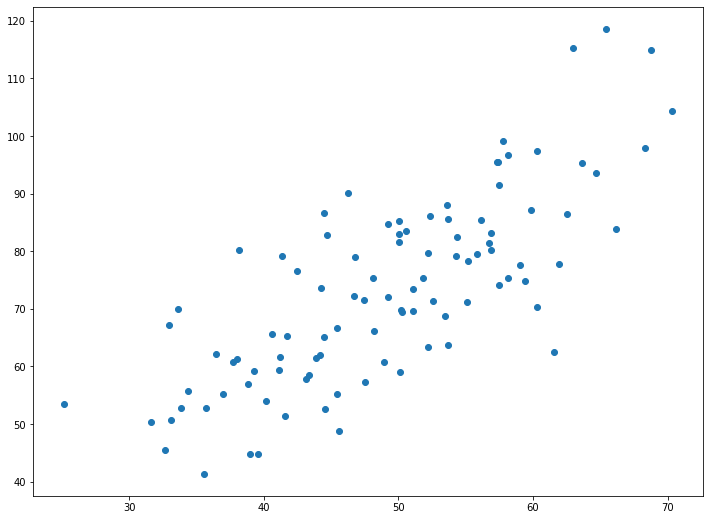

In [4]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Preprocessing Input data
data = pd.read_csv('data123.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

In [5]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

1.4796491688889395 0.10148121494753726


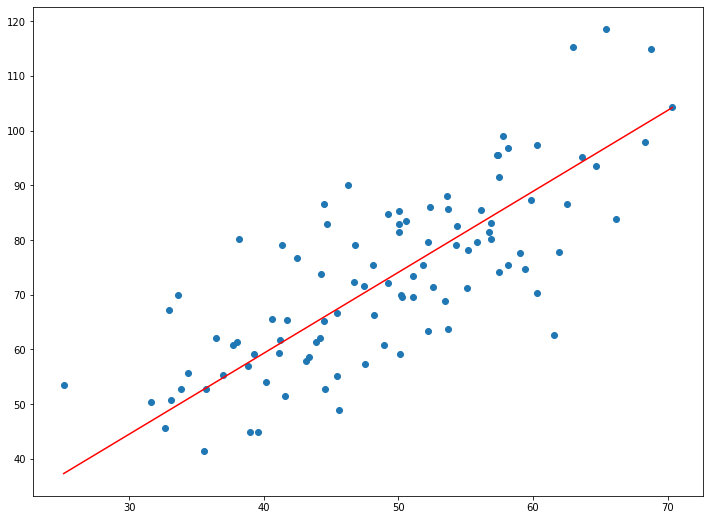

In [6]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

NPTEL Question:

In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression


In [14]:
colnames = ['a','b','c']
X = pd.read_csv("NPTELX.csv", names=colnames)
colname = ['target']
y = pd.read_csv("NPTELY.csv", names=colname)

In [15]:
X

,a,b,c
0,0.26,0.08,0.28
1,0.26,0.52,0.01
2,0.85,0.60,0.14
3,0.94,0.22,0.48
4,0.53,0.05,0.76
...,...,...,...
995,0.78,0.41,0.60
996,0.76,0.71,0.86
997,0.88,0.06,0.33
998,0.28,0.40,0.41


In [16]:
y

,target
0,1.472
1,1.802
2,1.548
3,1.390
4,2.141
...,...
995,2.245
996,3.471
997,0.796
998,2.406


In [17]:
linreg = LinearRegression()

In [18]:
linreg.fit(X, y)

LinearRegression()

In [19]:
print(linreg.intercept_)
print(linreg.coef_)

[1.]
[[-1.2  2.1  2.2]]
